## Credit Card Fraud Detection

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from time import time
sns.set_style("ticks")

In [3]:
train=pd.read_csv(r'../input/creditcardfraud/creditcard.csv')

In [4]:
train.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
def time_convert(my_seconds):
    return(dt.datetime(1970,1,1) + dt.timedelta(seconds=my_seconds))

In [6]:
train['Time'] = train['Time'].apply(time_convert)

In [7]:
train.set_index('Time',inplace=True)

In [8]:
train['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
amt_by_time = train.loc[:,['Amount']]
amt_by_time = amt_by_time[train.Class == 1]

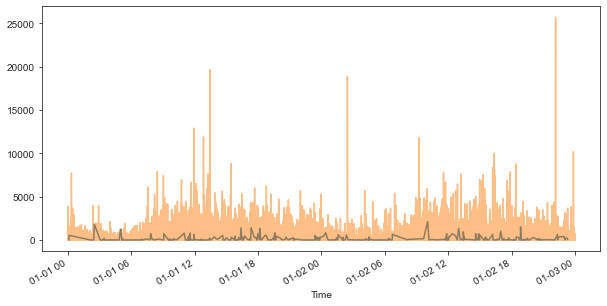

In [10]:
amt_by_time['Amount'].plot()
train['Amount'].plot(alpha=.5,figsize=(10,5))

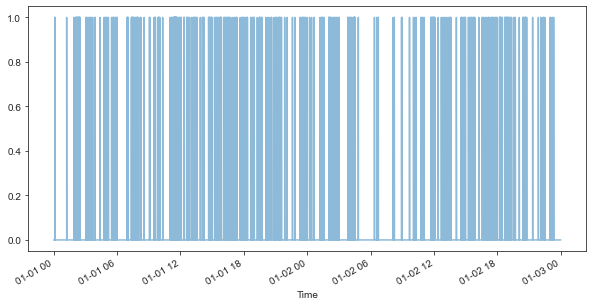

In [11]:
#amt_by_time['Amount'].plot()
train['Class'].plot(alpha=.5,figsize=(10,5))

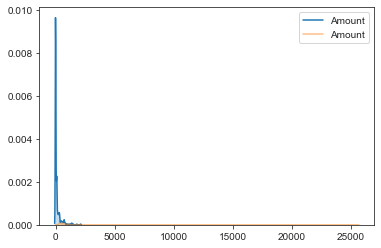

In [12]:
sns.kdeplot(amt_by_time['Amount'], shade=True)
sns.kdeplot(train['Amount'], shade=True,alpha =.5)

In [13]:
train['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
amt_by_time['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64